#IMPORT DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


DATASET: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
#IMPORTING LIBRARIES


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#DATA PREPROCESSING
#TRAINING IMAGE PREPROCESSING

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/f&v_dataset/Train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False

)

Found 5619 files belonging to 55 classes.


#VALIDATION IMAGE PREPROCESSING

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/f&v_dataset/Validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False

)

Found 550 files belonging to 55 classes.


#BUILDING MODEL

In [ ]:
cnn = tf.keras.models.Sequential()

#BUILDING CONVOLUTION LAYER

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5)) #we are dropping some neuron to avoid overfitting

#Output layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=55,activation='softmax'))

#Compiling and training phase

In [ ]:
# cnn.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.09), loss='categorical_crossentropy',metrics=['accuracy'])
cnn.compile(optimizer='RMSprop', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                   

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=50)

Epoch 1/50
176/176 [==============================] - 207s 1s/step - loss: 3.4057 - accuracy: 0.3639 - val_loss: 4.3870 - val_accuracy: 0.0182
Epoch 2/50
176/176 [==============================] - 207s 1s/step - loss: 3.7846 - accuracy: 0.3631 - val_loss: 4.4733 - val_accuracy: 0.0182
Epoch 3/50
176/176 [==============================] - 204s 1s/step - loss: 3.2738 - accuracy: 0.3627 - val_loss: 6.2347 - val_accuracy: 0.0182
Epoch 4/50
176/176 [==============================] - 212s 1s/step - loss: 3.1671 - accuracy: 0.3629 - val_loss: 4.4769 - val_accuracy: 0.0182
Epoch 5/50
176/176 [==============================] - 205s 1s/step - loss: 3.4064 - accuracy: 0.3631 - val_loss: 5.4000 - val_accuracy: 0.0218
Epoch 6/50
176/176 [==============================] - 205s 1s/step - loss: 3.4507 - accuracy: 0.3625 - val_loss: 4.6532 - val_accuracy: 0.0218
Epoch 7/50
176/176 [==============================] - 231s 1s/step - loss: 3.2762 - accuracy: 0.3627 - val_loss: 4.4704 - val_accuracy: 0.0236

#Saving Model

In [ ]:
cnn.save('trained_model_data.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
training_history.history #Return Dictionary

{'loss': [3.4056642055511475,
  3.784606695175171,
  3.2737629413604736,
  3.167050838470459,
  3.406400203704834,
  3.450678586959839,
  3.276184558868408,
  3.2704286575317383,
  3.2957191467285156,
  3.172870397567749,
  3.067328453063965,
  3.032263994216919,
  2.8751001358032227,
  2.714796304702759,
  2.5685746669769287,
  2.409550189971924,
  2.1920483112335205,
  1.9819409847259521,
  1.7823985815048218,
  1.64625084400177,
  1.4630249738693237,
  1.2651257514953613,
  1.182680606842041,
  1.0437161922454834,
  0.9181445240974426,
  0.84068363904953,
  0.7921218276023865,
  0.7097043395042419,
  0.6599087119102478,
  0.5874560475349426,
  0.5942056179046631,
  0.5253627896308899,
  0.5342540144920349,
  0.5232843160629272,
  0.4617099463939667,
  0.4574366807937622,
  0.4369675815105438,
  0.42787107825279236,
  0.4261999726295471,
  0.3981749415397644,
  0.3829309940338135,
  0.46827948093414307,
  0.4459385871887207,
  0.419401079416275,
  0.363407701253891,
  0.3555781543254

###Recording History In JSON

In [ ]:
import json
with open('training_hist_data.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


##Calculating Accuracy Of Model Achived On Validation Set

In [ ]:
print("Validation Set Accuracy : {} % ".format(training_history.history['val_accuracy'][-1]*100))

Validation Set Accuracy : 95.99999785423279 % 


#Accuracy Visualiation
##Training Visualiation

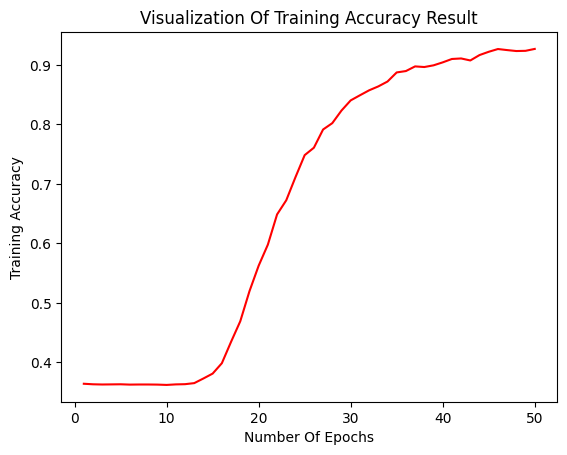

In [ ]:
epochs = [i for i in range(1,51)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('Number Of Epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualization Of Training Accuracy Result')
plt.show()

#Validation Accuracy

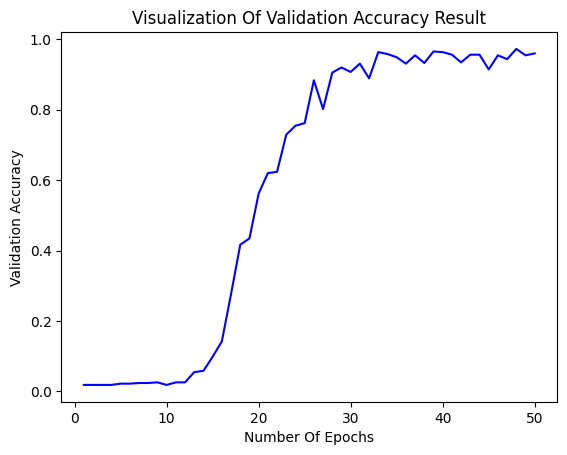

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('Number Of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization Of Validation Accuracy Result')
plt.show()

In [ ]:
training_loss, training_accuracy = cnn.evaluate(training_set)

176/176 [==============================] - 129s 695ms/step - loss: 0.0461 - accuracy: 0.9888


In [ ]:
val_loss, val_accuracy = cnn.evaluate(validation_set)

18/18 [==============================] - 19s 586ms/step - loss: 0.5073 - accuracy: 0.9600


###Test Set Evaluation

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/f&v_dataset/Test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False

)

Found 550 files belonging to 55 classes.


In [ ]:
test_loss, test_accuracy = cnn.evaluate(test_set)

18/18 [==============================] - 152s 4s/step - loss: 0.2273 - accuracy: 0.9836
